# Programming Exercise 5: Regularized Linear Regression and Bias v.s. Variance 

# Introduction

In this exercise, you will implement regularized linear regression and use it to study models with dierent bias-variance properties. Before starting on the programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics. 

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fmin_cg
import scipy.io

%matplotlib inline

# 1 Regularized Linear Regression
In the first half of the exercise, you will implement regularized linear regression to predict the amount of water flowing out of a dam using the change of water level in a reservoir. In the next half, you will go through some diagnostics of debugging learning algorithms and examine the effects of bias v.s. variance.

The provided script will help you step through this exercise.

## 1.1 Visualizing the dataset

We will begin by visualizing the dataset containing historical records on the change in the water level, x, and the amount of water flowing out of the dam, y.

This dataset is divided into three parts:
* A training set that your model will learn on: X, y
* A cross validation set for determining the regularization parameter: Xval, yval
* A test set for evaluating performance. These are \unseen" examples which your model did not see during training: Xtest, ytest 

The next step will plot the training data (Figure 1). In the following parts, you will implement linear regression and use that to fit a straight line to the data and plot learning curves. Following that, you will implement polynomial regression to find a better fit to the data.

Loading and Visualizing Data ...



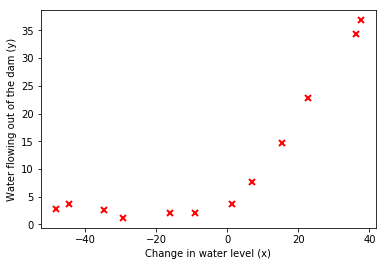

In [2]:
# =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset. 
#  The following code will load the dataset into your environment and plot
#  the data.
#

# Load Training Data
print('Loading and Visualizing Data ...\n')

# Load from ex5data1: 
# You will have X, y, Xval, yval, Xtest, ytest in your environment
a = scipy.io.loadmat('ex5data1.mat')
X = a['X']
y = a['y']
Xval = a['Xval']
yval = a['yval']
Xtest = a['Xtest']
ytest = a['ytest']

# m = Number of examples
m = X.shape[0]

# Plot training data
plt.plot(X, y, 'rx', mew=2)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

## 1.2 Regularized linear regression cost function

Recall that regularized linear regression has the following cost function:

$$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2 + \frac{\lambda}{2m}(\sum^n_{j=1}\theta^2_j)$$

where $\lambda$ is a regularization parameter which controls the degree of regularization (thus, help preventing overfitting). The regularization term puts a penalty on the overal cost $J$. As the magnitudes of the model parameters $\theta_j$ increase, the penalty increases as well. Note that you should not regularize the $\theta_0$ term. 

You should now complete the code in the file linearRegCostFunction. Your task is to write a function to calculate the regularized linear regression cost function. If possible, try to vectorize your code and avoid writing loops. When you are finished, the next part will run your cost function using theta initialized at [1; 1]. You should expect to see an output of 303.993

In [3]:
def linearRegCostFunction(X, y, theta, lambda_t):
    mask_array = np.ones((len(theta), 1))
    mask_array[0,0] = 0.0
    with np.errstate(divide='ignore'):
        m = len(y)  
        htheta = np.matmul(X, theta)
        # use auxiliary cost function
        J = 1 /2/m * np.sum(np.square(htheta - y)) \
                + lambda_t/2/m*np.sum(np.multiply(mask_array, theta)**2)

        # use auxiliary gradient function
        grad = np.matmul(X.T, (htheta - y)) / m + np.multiply(mask_array, theta) * lambda_t / m
    
        return J, grad

In [4]:
# =========== Part 2: Regularized Linear Regression Cost =============
#  You should now implement the cost function for regularized linear 
#  regression. 
#

theta = np.ones((2,1))
J, _ = linearRegCostFunction(np.hstack((np.ones((m, 1)), X)), y, theta, 1);

print('Cost at theta = [1 ; 1]: %f \n(this value should be about 303.993192)\n' %J);

Cost at theta = [1 ; 1]: 303.993192 
(this value should be about 303.993192)



## 1.3 Regularized linear regression gradient
Correspondingly, the partial derivative of regularized linear regression's cost for $\theta_j$ is defined as

$$ 
\begin{align}
\frac{\partial J(\theta)}{\partial \theta_0}=\frac{1}{m}\sum\limits^{m}_{i=1}(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j & & \mbox{ for $j=0$} \\
\frac{\partial J(\theta)}{\partial \theta_j}=(\frac{1}{m}\sum\limits^{m}_{i=1}(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j) + \frac{\lambda}{m}\theta_j & & \mbox{ for $j>=1$}
\end{align}
$$ 

In linearRegCostFunction, add code to calculate the gradient, returning it in the variable grad. When you are finished, the next part will run your gradient function using theta initialized at [1; 1]. You should expect to see a gradient of [-15.30; 598.250].

In [5]:
# =========== Part 3: Regularized Linear Regression Gradient =============
#  You should now implement the gradient for regularized linear 
#  regression.
#

theta = np.ones((2,1))
_, grad = linearRegCostFunction(np.hstack((np.ones((m, 1)), X)), y, theta, 1)

print('Gradient at theta = [1 ; 1]:  [%f; %f] \n(this value should be about [-15.303016; 598.250744])\n' \
      % (grad[0], grad[1]))

Gradient at theta = [1 ; 1]:  [-15.303016; 598.250744] 
(this value should be about [-15.303016; 598.250744])



## 1.4 Fitting linear regression

Once your cost function and gradient are working correctly, the next part will run the code in trainLinearReg to compute the optimal values of $\theta$. This training function uses fmin_cg to optimize the cost function.

In this part, we set regularization parameter $\lambda$ to zero. Because our current implementation of linear regression is trying to fit a 2-dimensional $\theta$, regularization will not be incredibly helpful for a $\theta$ of such low dimension. In the later parts of the exercise, you will be using polynomial regression with regularization. 

Finally, script should also plot the best fit line, resulting in an image similar to Figure 2. The best fit line tells us that the model is not a good fit to the data because the data has a non-linear pattern. While visualizing the best fit as shown is one possible way to debug your learning algorithm, it is not always easy to visualize the data and model. In the next section, you will implement a function to generate learning curves that can help you debug your learning algorithm even if it is not easy to visualize the data.


In [6]:
def trainLinearReg(X, y, lambda_t):
    
    # initialize Theta
    initial_theta = np.zeros((X.shape[1], 1))
    
    # create cost and grad functions
    cost = lambda t: linearRegCostFunction(X, y, t.reshape(t.size,1), lambda_t)[0]
    grad = lambda t: linearRegCostFunction(X, y, t.reshape(t.size,1), lambda_t)[1].flatten()
    
    # minimize using fmincg
    theta = fmin_cg(cost, initial_theta.T, fprime=grad, maxiter=200, disp=False)

    return theta.reshape(theta.size, -1)

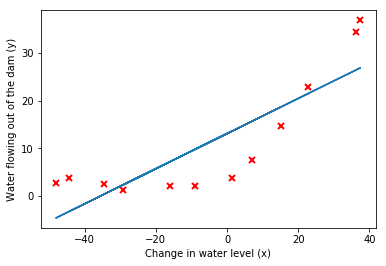

In [7]:
# =========== Part 4: Train Linear Regression =============
#  Once you have implemented the cost and gradient correctly, the
#  trainLinearReg function will use your cost function to train 
#  regularized linear regression.
# 
#  Write Up Note: The data is non-linear, so this will not give a great 
#                 fit.
#

#  Train linear regression with lambda = 0
lambda_t = 0;
Xnew= np.hstack((np.ones((m, 1)), X))
theta = trainLinearReg(Xnew, y, lambda_t);

#  Plot fit over the data
plt.plot(X, y, 'rx', mew=2)
plt.plot(X, np.dot(Xnew,theta))
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

# 2 Bias-variance
An important concept in machine learning is the bias-variance tradeof. Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit to the training data.

In this part of the exercise, you will plot training and test errors on a learning curve to diagnose bias-variance problems.

### 2.1 Learning curves
You will now implement code to generate the learning curves that will be useful in debugging learning algorithms. Recall that a learning curve plots training and cross validation error as a function of training set size. Your job is to fill in learningCurve so that it returns a vector of errors for the training set and cross validation set.

To plot the learning curve, we need a training and cross validation set error for different training set sizes. To obtain different training set sizes, you should use different subsets of the original training set X. Specifically, for a training set size of i, you should use the first i examples (i.e., X(1:i,:) and y(1:i)).

You can use the trainLinearReg function to find the $\theta$ parameters. Note that the lambda is passed as a parameter to the learningCurve function. After learning the $\theta$ parameters, you should compute the error on the training and cross validation sets. Recall that the training error for a dataset is defined as

$$J_{train}(\theta)=\frac{1}{2m}[\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2]$$

In particular, note that the training error does not include the regularization term. One way to compute the training error is to use your existing cost function and set $\lambda$ to 0 only when using it to compute the training error and cross validation error. When you are computing the training set error, make sure you compute it on the training subset (i.e., X(1:n,:) and y(1:n)) (instead of the entire training set). However, for the cross validation error, you should compute it over the entire cross validation set. You should store the computed errors in the vectors error train and error val. When you are finished, it wil print the learning curves and produce a plot similar to Figure 3.

In Figure 3, you can observe that both the train error and cross validation error are high when the number of training examples is increased. This reflects a high bias problem in the model { the linear regression model is too simple and is unable to t our dataset well. In the next section, you will implement polynomial regression to fit a better model for this dataset.

In [8]:
def learningCurve(X, y, Xval, yval, lambda_t):
    
    m = X.shape[0]
    
    error_train = np.zeros(m)
    error_val = np.zeros(m)    
    
    # compute training error over subset of training set
    for ct, ii in enumerate(range(1,m+1)):
                
        # compute theta for traning subset
        theta = trainLinearReg(X[:ii,:], y[:ii], lambda_t)
        
        # training/validation error
        error_train[ct] = linearRegCostFunction(X[:ii,:], y[:ii], theta, 0)[0]
        error_val[ct] = linearRegCostFunction(Xval, yval, theta, 0)[0]
        
    return error_train, error_val

# Training Examples	Train Error	Cross Validation Error

  	1		0.000000	205.121096

  	2		0.000000	110.300366

  	3		3.286595	45.010232

  	4		2.842678	48.368911

  	5		13.154049	35.865141

  	6		19.443963	33.829957

  	7		20.098522	31.970987

  	8		18.172859	30.862446

  	9		22.609405	31.135998

  	10		23.261462	28.936207

  	11		24.317250	29.551432

  	12		22.373906	29.433818



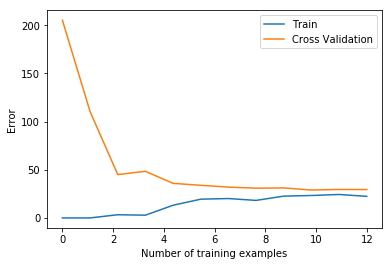

In [9]:
# =========== Part 5: Learning Curve for Linear Regression =============
#  Next, you should implement the learningCurve function. 
#
#  Write Up Note: Since the model is underfitting the data, we expect to
#                 see a graph with "high bias" -- Figure 3 in ex5.pdf 
#

lambda_t = 0;
error_train, error_val = learningCurve( \
            np.hstack((np.ones((m, 1)), X)), y, \
            np.hstack((np.ones((Xval.shape[0], 1)), Xval)), \
            yval, lambda_t)

plt.plot(np.linspace(0, m, m), error_train, label='Train')
plt.plot(np.linspace(0, m, m), error_val, label='Cross Validation')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()

print('# Training Examples\tTrain Error\tCross Validation Error\n');
for i in range(0, m):
    print('  \t%d\t\t%f\t%f\n' % (i+1, error_train[i], error_val[i]));

# 3 Polynomial regression 

The problem with our linear model was that it was too simple for the data and resulted in undertting (high bias). In this part of the exercise, you will address this problem by adding more features.

For use polynomial regression, our hypothesis has the form: 

$$h_\theta(x) = \theta_0 + \theta_1 * (waterLevel) + \theta_2 * (waterLevel)^2 + \cdots + \theta_p * (waterLevel)^p
= \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_px_p.$$

Notice that by defining $x_1 = (waterLevel), x_2 = (waterLevel)^2, \cdots , x_p = (waterLevel)^p$, we obtain a linear regression model where the features are the various powers of the original value (waterLevel). 

Now, you will add more features using the higher powers of the existing feature x in the dataset. Your task in this part is to complete the code in polyFeatures so that the function maps the original training set X of size $m \times 1$ into its higher powers. Specifically, when a training set X of size $m \times 1$ is passed into the function, the function should return a $m \times p$ matrix X_poly, where column 1 holds the original values of X, column 2 holds the values of X.^2, column 3 holds the values of X.^3, and so on. Note that you don't have to account for the zero-eth power in this function. 

Now you have a function that will map features to a higher dimension, and Part 6 of the script will apply it to the training set, the test set, and the cross validation set (which you haven't used yet).

In [10]:
def polyFeatures(X, p):
    
    m = X.shape[0]
    Xpoly = np.zeros((m, p))
    Xpoly[:,0] = X[:,0]
    
    for ii in range(1,p):
        Xpoly[:,ii] = X[:,0]**(ii+1)
        
    return Xpoly

def featureNormalize(X):
    
    # compute mean and standard deviation
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma  

def plotFit(min_x, max_x, mu, sigma, theta, p):
    
    x = np.arange(min_x-15, max_x+25, 0.05)
    x = np.reshape(x, (len(x), 1))
    
    # Map X and normalize
    X_poly = polyFeatures(x, p)
    X_poly = (X_poly - mu) / sigma
    X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), 
                         X_poly))
    
    # plot
    plt.plot(x, np.dot(X_poly,theta))

In [11]:
# =========== Part 6: Feature Mapping for Polynomial Regression =============
#  One solution to this is to use polynomial regression. You should now
#  complete polyFeatures to map each example into its powers
#

p = 8;

# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)                    # Normalize
X_poly = np.hstack((np.ones((m, 1)), X_poly))                   # Add Ones

# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = (X_poly_test - mu) / sigma
X_poly_test = np.hstack((np.ones((X_poly_test.shape[0], 1)), X_poly_test))         # Add Ones

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p)
X_poly_val = (X_poly_val - mu) / sigma
X_poly_val = np.hstack((np.ones((X_poly_val.shape[0], 1)), X_poly_val))           # Add Ones

print('Normalized Training Example 1:\n')
print(X_poly[0, :])

Normalized Training Example 1:

[ 1.         -0.36214078 -0.75508669  0.18222588 -0.70618991  0.30661792
 -0.59087767  0.3445158  -0.50848117]


## 3.1 Learning Polynomial Regression

After you have completed polyFeatures, the script will proceed to train polynomial regression using your linear regression cost function. 

Keep in mind that even though we have polynomial terms in our feature vector, we are still solving a linear regression optimization problem. The polynomial terms have simply turned into features that we can use for linear regression. We are using the same cost function and gradient that you wrote for the earlier part of this exercise.

For this part of the exercise, you will be using a polynomial of degree 8. It turns out that if we run the training directly on the projected data, will not work well as the features would be badly scaled (e.g., an example with x = 40 will now have a feature $x_8 = 40^8 = 6.5 \times 10^{12}$). Therefore, you will need to use feature normalization.

Before learning the parameters $\theta$ for the polynomial regression, ex5.m will first call featureNormalize and normalize the features of the training set, storing the mu, sigma parameters separately. We have already implemented this function for you and it is the same function from the first exercise. 

After learning the parameters $\theta$, you should see two plots (Figure 4,5) generated for polynomial regression with $\lambda$ = 0. 

From Figure 4, you should see that the polynomial fit is able to follow the datapoints very well - thus, obtaining a low training error. However, the polynomial fit is very complex and even drops off at the extremes. This is an indicator that the polynomial regression model is overfitting the training data and will not generalize well.

To better understand the problems with the unregularized $(\lambda = 0)$ model, you can see that the learning curve (Figure 5) shows the same effect where the low training error is low, but the cross validation error is high. There is a gap between the training and cross validation errors, indicating a high variance problem.

One way to combat the overfitting (high-variance) problem is to add regularization to the model. In the next section, you will get to try different $\lambda$ parameters to see how regularization can lead to a better model.

Polynomial Regression (lambda = 1.000000)


# Training Examples	Train Error	Cross Validation Error

  	1		0.000000	138.846777

  	2		0.045769	143.523394

  	3		2.911375	5.534713

  	4		1.499413	6.609883

  	5		1.199178	6.634112

  	6		0.924511	8.291998

  	7		1.540892	5.737148

  	8		1.422968	5.516434

  	9		1.553726	6.239793

  	10		1.441565	5.983045

  	11		1.308148	6.043763

  	12		2.076188	4.260631



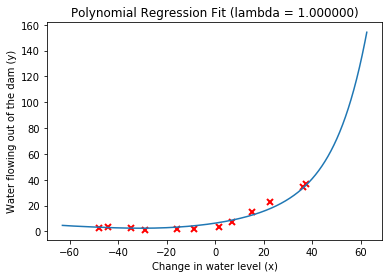

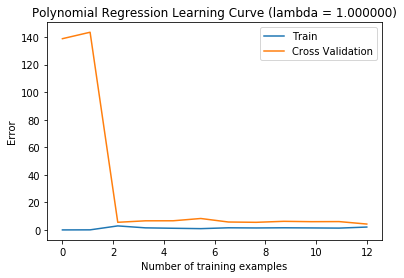

In [12]:
# =========== Part 7: Learning Curve for Polynomial Regression =============
#  Now, you will get to experiment with polynomial regression with multiple
#  values of lambda. The code below runs polynomial regression with 
#  lambda = 0. You should try running the code with different values of
#  lambda to see how the fit and learning curve change.
#

lambda_t = 1;
theta = trainLinearReg(X_poly, y, lambda_t);

# Plot training data and fit
plt.figure()
plt.plot(X, y, 'rx', mew=2)
plotFit(np.min(X), np.max(X), mu, sigma, theta, p)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial Regression Fit (lambda = %f)'%lambda_t)

plt.figure()
error_train, error_val = learningCurve( \
            X_poly, y, \
            X_poly_val, \
            yval, lambda_t)

plt.plot(np.linspace(0, m, m), error_train, label='Train')
plt.plot(np.linspace(0, m, m), error_val, label='Cross Validation')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.title('Polynomial Regression Learning Curve (lambda = %f)' % lambda_t);
plt.legend()

print('Polynomial Regression (lambda = %f)\n\n' % lambda_t);
print('# Training Examples\tTrain Error\tCross Validation Error\n');
for i in range(0,m):
    print('  \t%d\t\t%f\t%f\n' % (i+1, error_train[i], error_val[i]))


Polynomial Regression (lambda = 0.000000)


# Training Examples	Train Error	Cross Validation Error

  	1		0.000000	160.721900

  	2		0.000000	160.121510

  	3		0.000000	61.755005

  	4		0.000000	61.928895

  	5		0.000000	6.597787

  	6		0.000000	10.647701

  	7		0.007249	17.446595

  	8		0.056996	7.572351

  	9		0.000421	31.053268

  	10		0.043569	13.908422

  	11		0.034430	31.725850

  	12		0.057143	8.463752



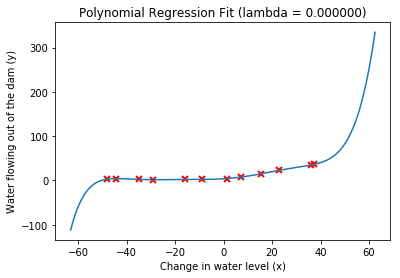

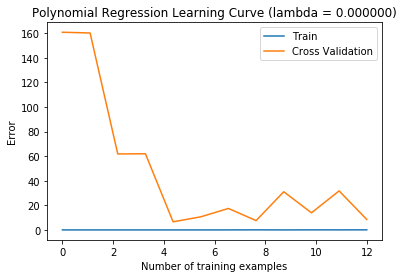

In [13]:
#Error in this function, Shit

lambda_t = 0;
theta = trainLinearReg(X_poly, y, lambda_t);

# Plot training data and fit
plt.figure()
plt.plot(X, y, 'rx', mew=2)
plotFit(np.min(X), np.max(X), mu, sigma, theta, p)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial Regression Fit (lambda = %f)'%lambda_t)

plt.figure()
error_train, error_val = learningCurve( \
            X_poly, y, \
            X_poly_val, \
            yval, lambda_t)

plt.plot(np.linspace(0, m, m), error_train, label='Train')
plt.plot(np.linspace(0, m, m), error_val, label='Cross Validation')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.title('Polynomial Regression Learning Curve (lambda = %f)' % lambda_t);
plt.legend()

print('Polynomial Regression (lambda = %f)\n\n' % lambda_t);
print('# Training Examples\tTrain Error\tCross Validation Error\n');
for i in range(0, m):
    print('  \t%d\t\t%f\t%f\n' % (i+1, error_train[i], error_val[i]))

## 3.2 Optional (ungraded) exercise: Adjusting the regularization parameter

In this section, you will get to observe how the regularization parameter affects the bias-variance of regularized polynomial regression. You should now modify the the lambda parameter in the script and try $\lambda = 1, 100$. For each of these values, the script should generate a polynomial fit to the data and also a learning curve.

For $\lambda = 1$, you should see a polynomial fit that follows the data trend well (Figure 6) and a learning curve (Figure 7) showing that both the cross validation and training error converge to a relatively low value. This shows the $\lambda = 1$ regularized polynomial regression model does not have the high-bias or high-variance problems. In effect, it achieves a good trade-off between bias and variance.

For $\lambda = 100$, you should see a polynomial fit (Figure 8) that does not follow the data well. In this case, there is too much regularization and the model is unable to fit the training data.

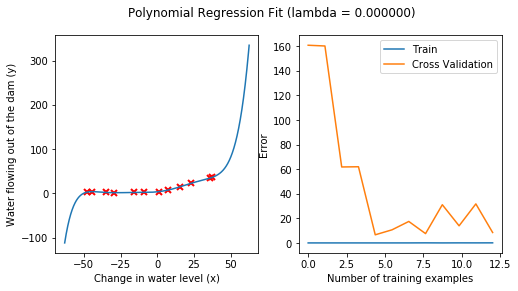

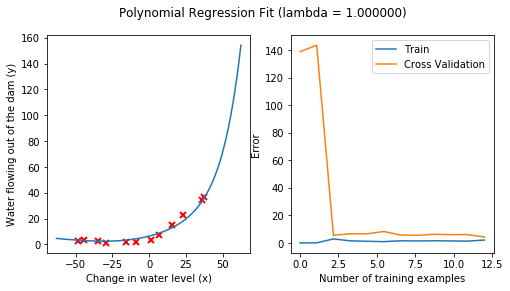

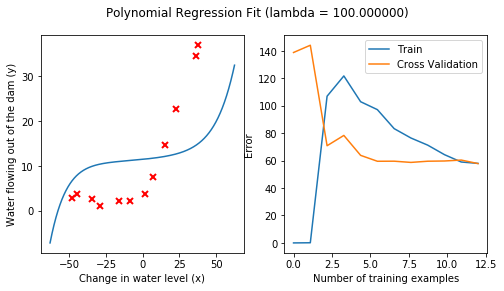

In [14]:
# train model on training set
lams = [0, 1, 100]

for lam in lams:
    
    theta = trainLinearReg(X_poly, y, lam)

    # learning curve
    error_train, error_val = learningCurve(
        X_poly, y, X_poly_val, yval, lam)
    
    fig = plt.figure(figsize=(8,4))

    # plot fit
    ax = plt.subplot(121)
    ax.plot(X, y, 'rx', mew=2)
    plotFit(np.min(X), np.max(X), mu, sigma, theta, p)
    ax.set_xlabel('Change in water level (x)')
    ax.set_ylabel('Water flowing out of the dam (y)')

    # plot learning curve
    ax = plt.subplot(122)
    ax.plot(np.linspace(0, m, m), error_train, label='Train')
    ax.plot(np.linspace(0, m, m), error_val, label='Cross Validation')
    ax.set_xlabel('Number of training examples')
    ax.set_ylabel('Error')
    ax.legend()
    
    plt.suptitle('Polynomial Regression Fit (lambda = %f)'%lam)

### 3.3 Selecting $\lambda$ using a cross validation set

From the previous parts of the exercise, you observed that the value of $\lambda$ can significantly affect the results of regularized polynomial regression on the training and cross validation set. In particular, a model without regularization $(\theta = 0)$ fits the training set well, but does not generalize. Conversely, a model with too much regularization $(\lambda = 100)$ does not fit the training set and testing set well. A good choice of $\lambda$ (e.g., $\lambda$ = 1) can provide a good fit to the data.

In this section, you will implement an automated method to select the $\lambda$ parameter. Concretely, you will use a cross validation set to evaluate how good each $\lambda$ value is. After selecting the best $\lambda$ value using the cross validation set, we can then evaluate the model on the test set to estimate how well the model will perform on actual unseen data.

Your task is to complete the code in validationCurve. Specifically, you should should use the trainLinearReg function to train the model using different values of $\lambda$ and compute the training error and cross validation error. You should try $\lambda$ in the following range: $\{0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10\}$.

After you have completed the code, the next part of ex5.m will run your function can plot a cross validation curve of error v.s. $\lambda$ that allows you select which $\lambda$ parameter to use. You should see a plot similar to Figure 9. In this figure, we can see that the best value of $\lambda$ is around 3. Due to randomness in the training and validation splits of the dataset, the cross validation error can sometimes be lower than the training error.

In [15]:
def validationCurve(X, y, Xval, yval):
    
    lams = [0, 0.001, 0.003, 0.01, 0.03, 0.1,
            0.3, 1, 3, 10]
    
    error_train = np.zeros(len(lams))
    error_val = np.zeros(len(lams))
    
    for ct, lam in enumerate(lams):
        
        # compute theta for traning set
        theta = trainLinearReg(X, y, lam)
        
        # training/validation error
        error_train[ct] = linearRegCostFunction(X, y, theta, 0)[0]
        error_val[ct] = linearRegCostFunction(Xval, yval, theta, 0)[0]
        
    
    return np.array(lams), error_train, error_val

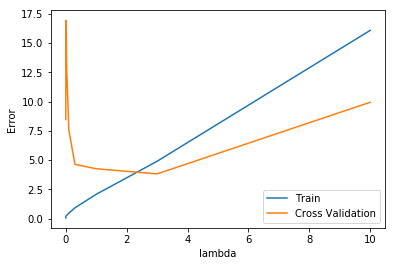

In [16]:
lams, error_train, error_val = validationCurve(
    X_poly, y, X_poly_val, yval)


plt.plot(lams, error_train, label='Train')
plt.plot(lams, error_val, label='Cross Validation')
plt.xlabel('lambda')
plt.ylabel('Error')
plt.legend(loc='best')

### 3.4 Optional (ungraded) exercise: Computing test set error

In the previous part of the exercise, you implemented code to compute the cross validation error for various values of the regularization parameter $\lambda$. However, to get a better indication of the model's performance in the real world, it is important to evaluate the "final" model on a test set that was not used in any part of training (that is, it was neither used to select the $\lambda$ parameters, nor to learn the model parameters $\theta$). 

For this optional (ungraded) exercise, you should compute the test error using the best value of $\lambda$ you found. In our cross validation, we obtained a test error of 3.8599 for $\lambda$ = 3.

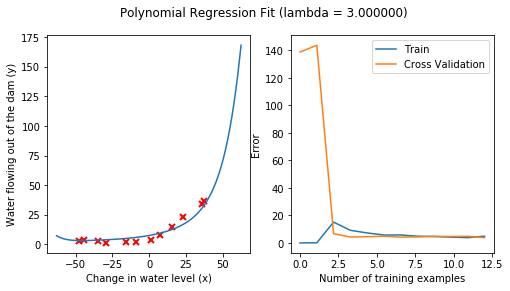

In [17]:
# train model on training set
lam = 3
theta = trainLinearReg(X_poly, y, lam)

# learning curve
error_train, error_val = learningCurve(
    X_poly, y, X_poly_val, yval, lam)

fig = plt.figure(figsize=(8,4))

# plot fit
ax = plt.subplot(121)
ax.plot(X, y, 'rx', mew=2)
plotFit(np.min(X), np.max(X), mu, sigma, theta, p)
ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam (y)')

# plot learning curve
ax = plt.subplot(122)
ax.plot(np.linspace(0, m, m), error_train, label='Train')
ax.plot(np.linspace(0, m, m), error_val, label='Cross Validation')
ax.set_xlabel('Number of training examples')
ax.set_ylabel('Error')
ax.legend()

plt.suptitle('Polynomial Regression Fit (lambda = %f)'%lam)

In [18]:
#Calculate the test set error
print(linearRegCostFunction(X_poly_test, ytest, theta, 0)[0])

3.85988783349


## 3.5 Optional (ungraded) exercise: Plotting learning curves with randomly selected examples

In practice, especially for small training sets, when you plot learning curves to debug your algorithms, it is often helpful to average across multiple sets of randomly selected examples to determine the training error and cross validation error.

Concretely, to determine the training error and cross validation error for i examples, you should first randomly select i examples from the training set and i examples from the cross validation set. You will then learn the parameters $\theta$ using the randomly chosen training set and evaluate the parameters $\theta$ on the randomly chosen training set and cross validation set. The above steps should then be repeated multiple times (say 50) and the averaged error should be used to determine the training error and cross validation error for i examples.

For this optional (ungraded) exercise, you should implement the above strategy for computing the learning curves. For reference, figure 10 shows the learning curve we obtained for polynomial regression with $\lambda = 0.01$. Your figure may differ slightly due to the random selection of examples.

In [19]:
def learningCurveRandom(X, y, Xval, yval, lam):
    
    m = X.shape[0]
    nreal = 50
    
    error_train = np.zeros(m)
    error_val = np.zeros(m)    
    
    # compute training error over subset of training set
    for ct, ii in enumerate(range(1,m+1)):
        train_tmp = np.zeros(nreal)
        val_tmp = np.zeros(nreal)
        for jj in range(nreal):
            
            ind = np.random.choice(np.arange(0, m), size=ii, replace=False)
                
            # compute theta for traning subset
            theta = trainLinearReg(X[ind,:], y[ind], lam)

            # training/validation error
            train_tmp[jj] = linearRegCostFunction(X[ind,:], y[ind], theta, 0)[0]
            val_tmp[jj] = linearRegCostFunction(Xval, yval, theta, 0)[0]
        
        error_train[ct] = train_tmp.mean()
        error_val[ct] = val_tmp.mean()
        
    return error_train, error_val

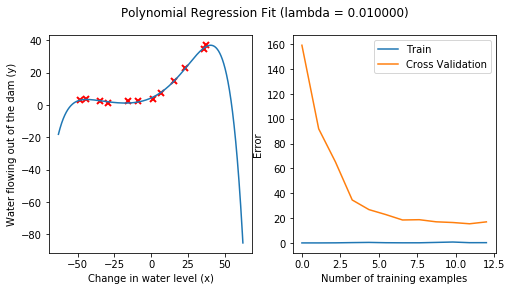

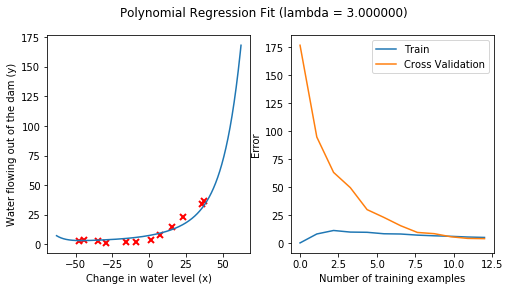

In [20]:
# train model on training set
lams = [0.01, 3]

for lam in lams:
    
    theta = trainLinearReg(X_poly, y, lam)

    # learning curve
    error_train, error_val = learningCurveRandom(
        X_poly, y, X_poly_val, yval, lam)
    
    fig = plt.figure(figsize=(8,4))

    # plot fit
    ax = plt.subplot(121)
    ax.plot(X, y, 'rx', mew=2)
    plotFit(np.min(X), np.max(X), mu, sigma, theta, p)
    ax.set_xlabel('Change in water level (x)')
    ax.set_ylabel('Water flowing out of the dam (y)')

    # plot learning curve
    ax = plt.subplot(122)
    ax.plot(np.linspace(0, m, m), error_train, label='Train')
    ax.plot(np.linspace(0, m, m), error_val, label='Cross Validation')
    ax.set_xlabel('Number of training examples')
    ax.set_ylabel('Error')
    ax.legend()
    
    plt.suptitle('Polynomial Regression Fit (lambda = %f)'%lam)